In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [3]:
def import_bls_excel(directory, file_name):
    df = pd.read_excel(directory+file_name,
                  dtype = {'Year': 'Int16'},
                      skiprows=12)
    column = file_name.replace('.xlsx', '')
    df_new = pd.DataFrame(columns=['Year', 'Month', column])
    colnames = list(df.columns)
    colnames.remove('Year')
    for index in df.index:
        row = df.loc[index]
        for col in colnames:
            df_new.loc[len(df_new.index)] = [row['Year'],col,row[col]]
    return df_new.set_index(['Year', 'Month'])

In [4]:
def get_bls_data_merged(path, df_merge):
    for name in os.listdir(path):
        new_df = import_bls_excel(directory=path, file_name=name)
        df_merge = pd.merge(df_merge, new_df, left_index=True, right_index=True, how='left')
    return df_merge

In [9]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
dummy_data = []
for i in range(2010, 2021):
    for m in months:
        dummy_data.append([i,m])
df_dummy = pd.DataFrame(data=dummy_data, columns=['Year', 'Month'])
df_dummy.set_index(['Year', 'Month'], inplace=True)

ans = get_bls_data_merged(path='./BLS/Unemployment Level/', df_merge=df_dummy)

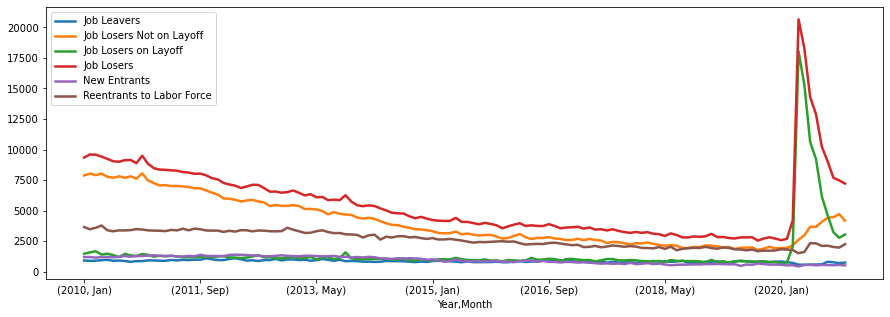

In [12]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
ans.plot(figsize=(15, 5), linewidth = 2.5);